# Laboratorium 3

### Konfiguracja

In [1]:
from definitions import *
from sweeping import *
from visual import *

<IPython.core.display.Javascript object>


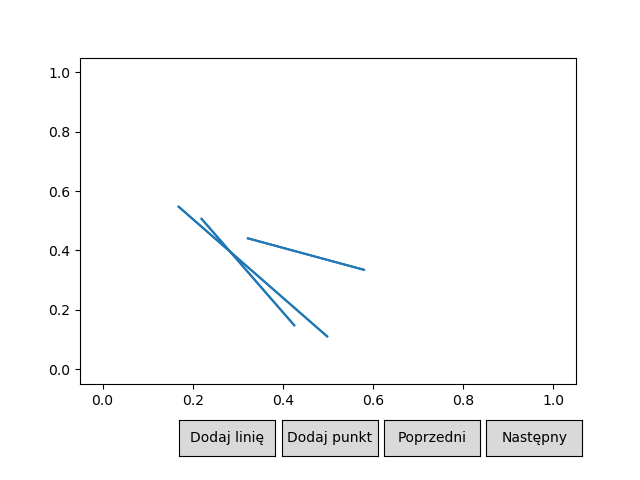

In [2]:
#Dodaj tu punkty i/lub odcinki!
%matplotlib notebook
plot1 = Plot()
plot1.draw()

In [3]:
lines = get_segments_from_plot(plot1)

### Rozwiązanie

In [11]:
def contains_intersection(data_set):
    events = prepare_events(data_set)
    state = SortedSet() # (point, event, [skey])

    def get_neighbours(segment):
        index = state.index(segment)
        return (state[index - 1].segment if index > 0 else None, #above
            state[index + 1].segment if index < len(state) - 1 else None) #bellow


    def add_intersection_if_exists(segment, neighbour, orientation):
        if neighbour and segment:
            point = get_intersection_point(segment, neighbour, orientation)
            return True if point else False


    def add_intersections(state, skey):
        above, below = get_neighbours(skey)
        return add_intersection_if_exists(skey.segment, above, BELOW) or \
               add_intersection_if_exists(skey.segment, below, ABOVE)

    for _, event, segments in iter_events(events):
        if event == START:
            [skey] = segments
            state.add(skey)
            if add_intersections(state, skey):
                return True
        elif event == END:
            [skey] = segments
            above, below = get_neighbours(skey)
            state.remove(skey)
            if add_intersection_if_exists(above, below, ABOVE):
                return True
    return False

In [12]:
contains_intersection(lines)

True

In [15]:
def sweep(data_set):
    events = prepare_events(data_set)
    state = SortedSet() # (point, event, [skey])
    intersections = []
    points = []

    def get_neighbours(segment):
        index = state.index(segment)
        return (state[index - 1].segment if index > 0 else None, #above
            state[index + 1].segment if index < len(state) - 1 else None) #bellow


    def swap_on(point, segments):
        above, below = segments
        state.remove(above)
        state.remove(below)

        above.op = below.op = point

        state.add(above)
        state.add(below)

    def add_intersection_if_exists(segment, neighbour, orientation):
        if neighbour and segment:
            point = get_intersection_point(segment, neighbour, orientation)
            if point:
                inter = tuple(sorted([segment, neighbour]))
                if inter not in intersections:
                    intersections.append(inter)
                    points.append(point)
                    events.put((point, INTERSECT, [Key(segment), Key(neighbour)]))


    def add_intersections(state, skey):
        above, below = get_neighbours(skey)
        add_intersection_if_exists(skey.segment, above, BELOW)
        add_intersection_if_exists(skey.segment, below, ABOVE)

    for point, event, segments in iter_events(events):
        if event == START:
            [skey] = segments
            state.add(skey)
            add_intersections(state, skey)
        elif event == END:
            [skey] = segments
            above, below = get_neighbours(skey)
            state.remove(skey)
            add_intersection_if_exists(above, below, ABOVE)
        else:
            above, below = segments
            swap_on(point, segments)

            add_intersections(state, above)
            add_intersections(state, below)

    return list(zip(points, intersections))

<IPython.core.display.Javascript object>


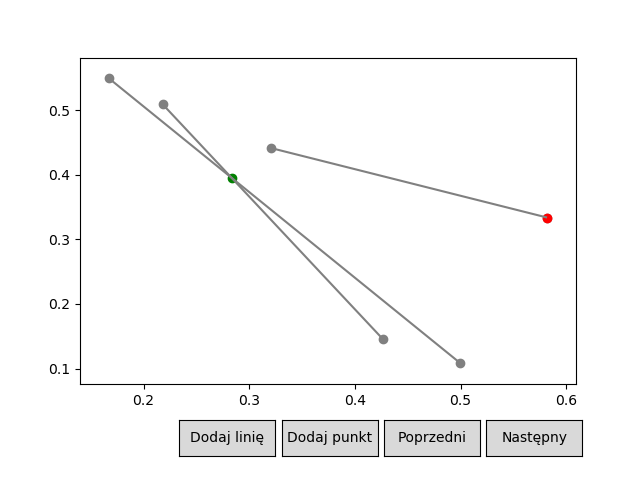

In [4]:
plot = Plot(list(algo_visual(lines)))
plot.draw()

In [16]:
sweep(lines)

[((0.08119329637096774, 0.7674594056372548),
  (((0.0008001512096774133, 0.9844094669117647),
    (0.12942918346774196, 0.637289368872549)),
   ((0.0030178931451612934, 0.7080614276960784),
    (0.38446950604838714, 0.9978898590686274)))),
 ((0.1568354016246503, 0.2889900750717045),
  (((-0.019159526209677424, 0.41823299632352934),
    (0.4443485383064516, 0.07785309436274501)),
   ((0.02297757056451616, 0.13177466299019597),
    (0.6284211189516129, 0.8428653492647058)))),
 ((0.08155794003565434, 0.344270526388701),
  (((-0.019159526209677424, 0.41823299632352934),
    (0.4443485383064516, 0.07785309436274501)),
   ((0.027413054435483863, 0.29016927083333327),
    (0.6749936995967742, 0.9372280943627451)))),
 ((0.15293724798387093, 0.8219707414215688),
  (((0.0030178931451612934, 0.7080614276960784),
    (0.38446950604838714, 0.9978898590686274)),
   ((0.1005985383064516, 0.981039368872549),
    (0.18709047379032256, 0.7181717218137254)))),
 ((0.1962169021073391, 0.4588370960654852),
